In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
data = pd.read_csv(r"C:\pyml_scripts\chapter04_logregression\LRdata1.txt", names=['x1','x2','y'], header=None)
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.groupby(['y'])['y'].count()

y
0    40
1    60
Name: y, dtype: int64

In [4]:
data0 = data[data['y']==0]
data1 = data[data['y']==1]

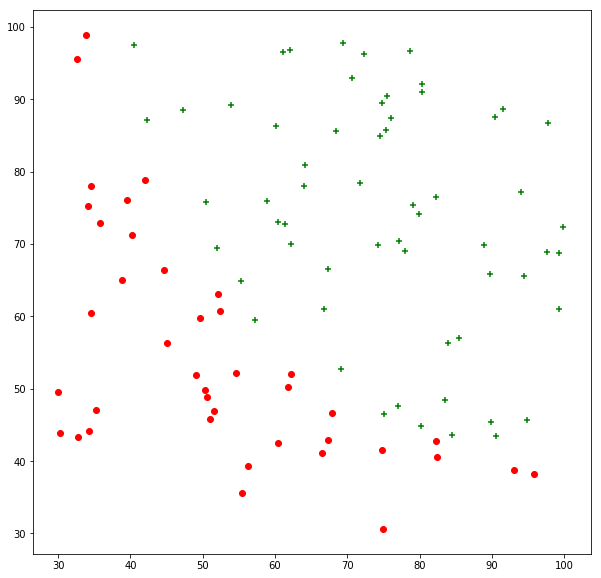

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(data0['x1'],data0['x2'],color='r',marker='o')
plt.scatter(data1['x1'],data1['x2'],color='g',marker='+')
plt.show()

In [6]:
X = np.array([data['x1'],data['x2']])
X.shape

(2, 100)

In [7]:
X

array([[34.62365962, 30.28671077, 35.84740877, 60.18259939, 79.03273605,
        45.08327748, 61.10666454, 75.02474557, 76.0987867 , 84.43281996,
        95.86155507, 75.01365839, 82.30705337, 69.36458876, 39.53833914,
        53.97105215, 69.07014406, 67.94685548, 70.66150955, 76.97878373,
        67.37202755, 89.67677575, 50.53478829, 34.21206098, 77.92409145,
        62.27101367, 80.19018075, 93.1143888 , 61.83020602, 38.7858038 ,
        61.37928945, 85.40451939, 52.10797973, 52.04540477, 40.23689374,
        54.63510555, 33.91550011, 64.17698887, 74.78925296, 34.18364003,
        83.90239366, 51.54772027, 94.44336777, 82.36875376, 51.04775177,
        62.22267576, 77.19303493, 97.77159928, 62.0730638 , 91.5649745 ,
        79.94481794, 99.27252693, 90.54671411, 34.52451385, 50.28649612,
        49.58667722, 97.64563396, 32.57720017, 74.24869137, 71.79646206,
        75.39561147, 35.28611282, 56.2538175 , 30.05882245, 44.66826172,
        66.56089447, 40.45755098, 49.07256322, 80.2

In [8]:
y = np.array(data['y'])
y.shape

(100,)

In [9]:
X = X.T
X.shape

(100, 2)

In [10]:
X

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [11]:
LR = linear_model.LogisticRegression()

In [12]:
LR.fit(X,y)  #C=1.0

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
LR_intercept = LR.intercept_
LR_intercept

array([-3.89977794])

In [14]:
[[LR_coef1,LR_coef2]] = LR.coef_
print(LR_coef1,LR_coef2)

0.038444815554882376 0.03101854556290846


In [15]:
db_x1 = np.array([min(X[:,0]),max(X[:,0])])

In [16]:
db_x1

array([30.05882245, 99.8278578 ])

In [17]:
def db_x2_fn(coef1,coef2,intercept,x1):
    return ((0-intercept-(coef1*x1))/coef2)

db_x2 = db_x2_fn(LR_coef1,LR_coef2,LR_intercept,db_x1)

In [18]:
db_x2

array([88.46875346,  1.99604344])

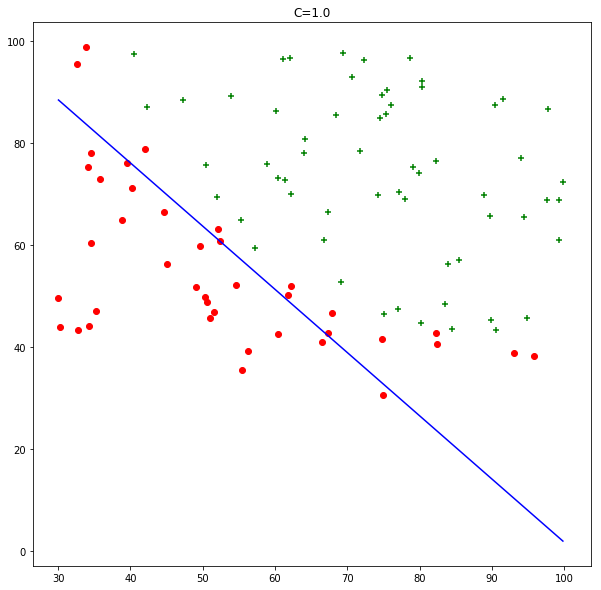

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(data0['x1'],data0['x2'],color='r',marker='o')
plt.scatter(data1['x1'],data1['x2'],color='g',marker='+')
plt.plot(db_x1,db_x2,c='b')
plt.title('C=1.0')
plt.show()

In [20]:
LR.score(X,y)

0.87

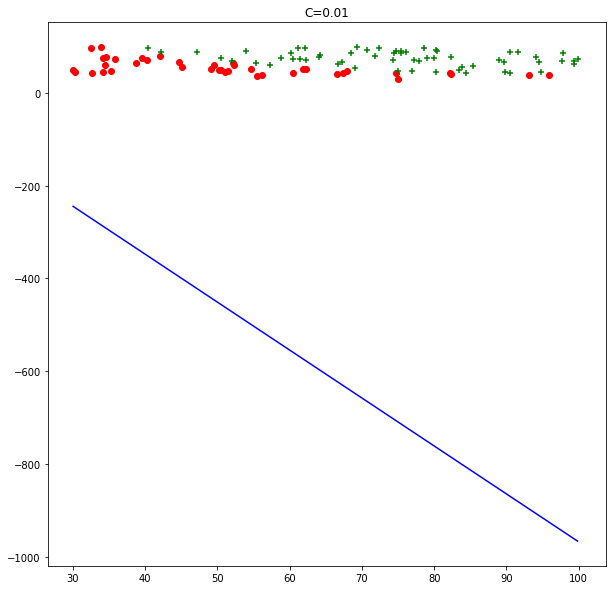

In [21]:
LR_dot_01 = linear_model.LogisticRegression(C=0.01)  #C越小表示正則化強度越大,即越不要求訓練階段的正確性
LR_dot_01.fit(X,y)
LR_intercept = LR_dot_01.intercept_
[[LR_coef1,LR_coef2]] = LR_dot_01.coef_
db_x1_01 = np.array([min(X[:,0]),max(X[:,0])])
db_x2_01 = db_x2_fn(LR_coef1,LR_coef2,LR_intercept,db_x1)
plt.figure(figsize=(10,10))
plt.scatter(data0['x1'],data0['x2'],color='r',marker='o')
plt.scatter(data1['x1'],data1['x2'],color='g',marker='+')
plt.plot(db_x1_01,db_x2_01,c='b')
plt.title('C=0.01')
plt.show()

In [22]:
LR_dot_01.score(X,y)

0.6

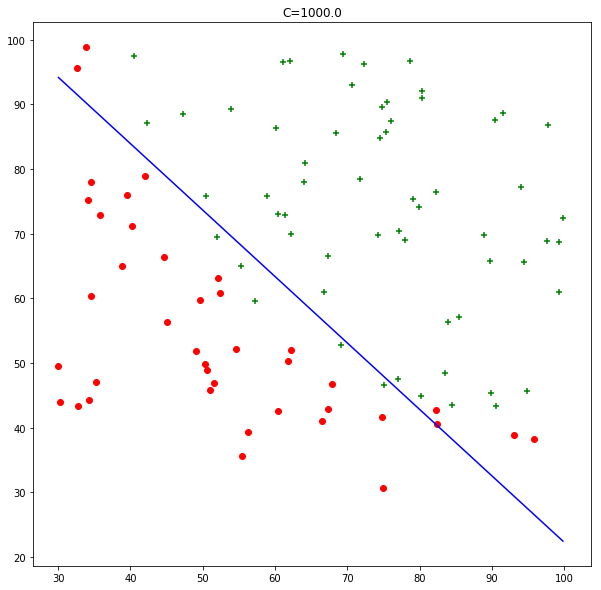

In [23]:
LR_1000 = linear_model.LogisticRegression(C=1000.0)  #C越大表示正則化強度越小,即越要求訓練階段的正確性
LR_1000.fit(X,y)
LR_intercept = LR_1000.intercept_
[[LR_coef1,LR_coef2]] = LR_1000.coef_
db_x1_1000 = np.array([min(X[:,0]),max(X[:,0])])
db_x2_1000 = db_x2_fn(LR_coef1,LR_coef2,LR_intercept,db_x1)
plt.figure(figsize=(10,10))
plt.scatter(data0['x1'],data0['x2'],color='r',marker='o')
plt.scatter(data1['x1'],data1['x2'],color='g',marker='+')
plt.plot(db_x1_1000,db_x2_1000,c='b')
plt.title('C=1000.0')
plt.show()

In [24]:
LR_1000.score(X,y)

0.89

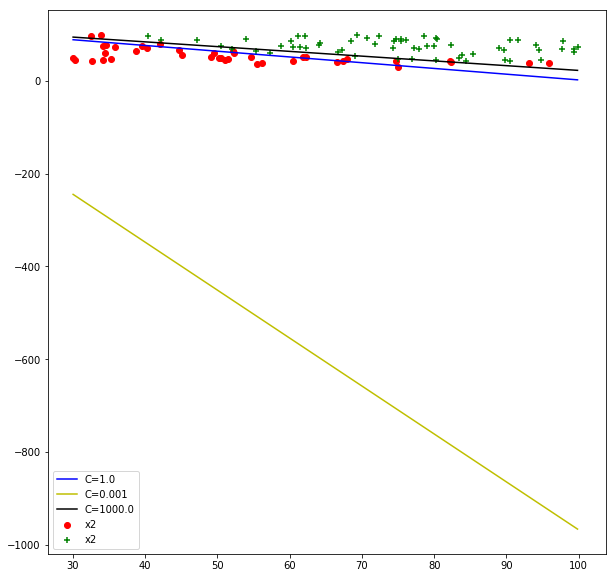

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(data0['x1'],data0['x2'],color='r',marker='o')
plt.scatter(data1['x1'],data1['x2'],color='g',marker='+')
plt.plot(db_x1,db_x2,c='b',label='C=1.0')
plt.plot(db_x1_01,db_x2_01,c='y',label='C=0.001')
plt.plot(db_x1_1000,db_x2_1000,c='k',label='C=1000.0')
plt.legend()
plt.show()

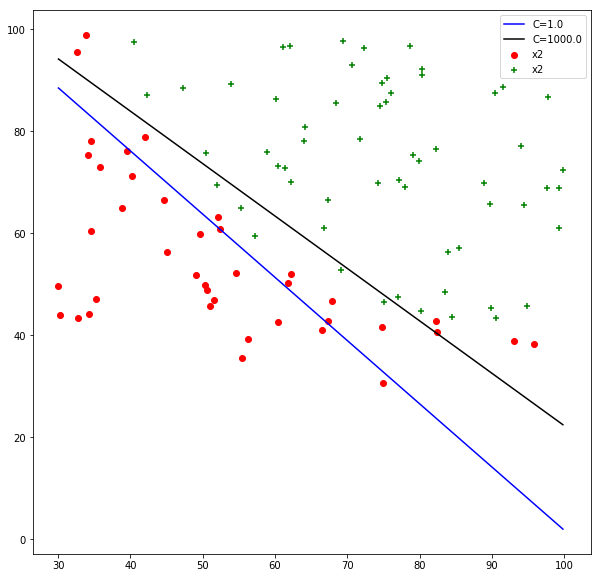

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(data0['x1'],data0['x2'],color='r',marker='o')
plt.scatter(data1['x1'],data1['x2'],color='g',marker='+')
plt.plot(db_x1,db_x2,c='b',label='C=1.0')
#plt.plot(db_x1_01,db_x2_01,c='y',label='C=0.001')
plt.plot(db_x1_1000,db_x2_1000,c='k',label='C=1000.0')
plt.legend()
plt.show()

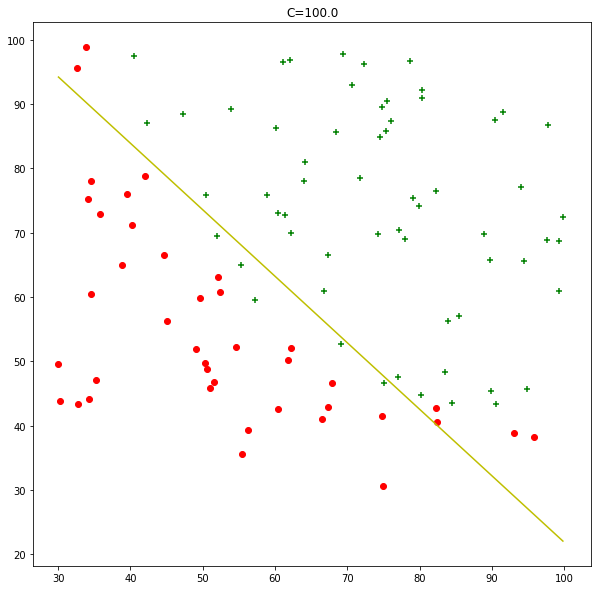

In [27]:
LR_100 = linear_model.LogisticRegression(C=100.0)  
LR_100.fit(X,y)
LR_intercept = LR_100.intercept_
[[LR_coef1,LR_coef2]] = LR_100.coef_
db_x1_100 = np.array([min(X[:,0]),max(X[:,0])])
db_x2_100 = db_x2_fn(LR_coef1,LR_coef2,LR_intercept,db_x1)
plt.figure(figsize=(10,10))
plt.scatter(data0['x1'],data0['x2'],color='r',marker='o')
plt.scatter(data1['x1'],data1['x2'],color='g',marker='+')
plt.plot(db_x1_100,db_x2_100,c='y')
plt.title('C=100.0')
plt.show()

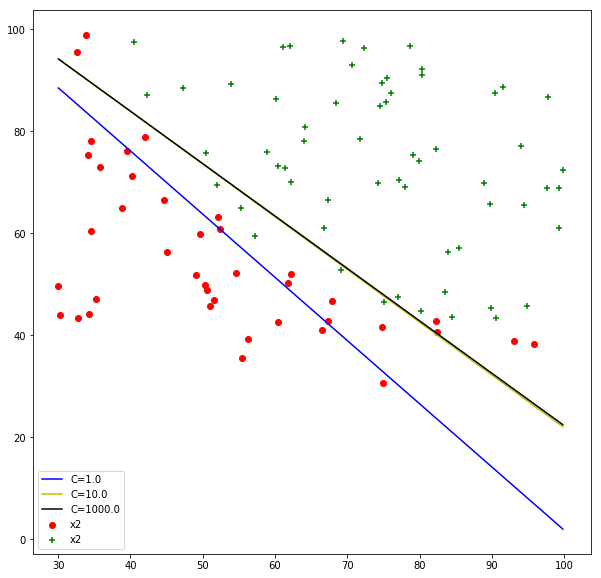

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(data0['x1'],data0['x2'],color='r',marker='o')
plt.scatter(data1['x1'],data1['x2'],color='g',marker='+')
plt.plot(db_x1,db_x2,c='b',label='C=1.0')
plt.plot(db_x1_100,db_x2_100,c='y',label='C=10.0')
plt.plot(db_x1_1000,db_x2_1000,c='k',label='C=1000.0')
plt.legend()
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [37]:
LR = linear_model.LogisticRegression() #C=1.0
LR.fit(X_train,y_train)
print(LR.score(X_train,y_train),LR.score(X_test,y_test))

0.8375 0.9


In [38]:
LR_C01 = linear_model.LogisticRegression(C=0.1)  
LR_C01.fit(X_train,y_train)
print(LR_C01.score(X_train,y_train),LR_C01.score(X_test,y_test))

0.5875 0.65


In [39]:
LR_C100 = linear_model.LogisticRegression(C=100)  
LR_C100.fit(X_train,y_train)
print(LR_C100.score(X_train,y_train),LR_C100.score(X_test,y_test))

0.8625 1.0
